In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-alexa-reviews/amazon_alexa.tsv


In [3]:
# Importing the dataset
df = pd.read_csv('/kaggle/input/amazon-alexa-reviews/amazon_alexa.tsv', delimiter = '\t', quoting = 3)

In [4]:
df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"""Perfect for kids, adults and everyone in betw...",1
3146,5,30-Jul-18,Black Dot,"""Listening to music, searching locations, chec...",1
3147,5,30-Jul-18,Black Dot,"""I do love these things, i have them running m...",1
3148,5,30-Jul-18,White Dot,"""Only complaint I have is that the sound quali...",1


In [5]:
df.isna().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [7]:
df.columns

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

In [9]:
del df['date']

In [10]:
del df['variation']
del df['feedback']


In [11]:
df

,rating,verified_reviews
0,5,Love my Echo!
1,5,Loved it!
2,4,"""Sometimes while playing a game, you can answe..."
3,5,"""I have had a lot of fun with this thing. My 4..."
4,5,Music
...,...,...
3145,5,"""Perfect for kids, adults and everyone in betw..."
3146,5,"""Listening to music, searching locations, chec..."
3147,5,"""I do love these things, i have them running m..."
3148,5,"""Only complaint I have is that the sound quali..."


In [16]:
def sentiment_rating(rating):
    
    if(int(rating) == 1 or int(rating) == 2 or int(rating) == 3):
        return 0
    else: 
        return 1
df.rating = df.rating.apply(sentiment_rating)

In [17]:
df.rating.value_counts()

1    2741
0     409
Name: rating, dtype: int64

In [18]:
df.columns = ['Liked','Review']

In [19]:
df

,Liked,Review
0,1,Love my Echo!
1,1,Loved it!
2,1,"""Sometimes while playing a game, you can answe..."
3,1,"""I have had a lot of fun with this thing. My 4..."
4,1,Music
...,...,...
3145,1,"""Perfect for kids, adults and everyone in betw..."
3146,1,"""Listening to music, searching locations, chec..."
3147,1,"""I do love these things, i have them running m..."
3148,1,"""Only complaint I have is that the sound quali..."


In [20]:
X=df.Review.astype('str')
y=df.Liked

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [22]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
vocab=1000
tokenizer=Tokenizer(vocab,oov_token="<oov>")
tokenizer.fit_on_texts(X_train)
train_sequence=tokenizer.texts_to_sequences(X_train)
test_sequence=tokenizer.texts_to_sequences(X_test)
padded_train=pad_sequences(train_sequence,maxlen=500)
padded_test=pad_sequences(test_sequence,maxlen=500)

Using TensorFlow backend.


In [24]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Embedding,GlobalAveragePooling1D,Bidirectional
from keras.optimizers import Adam

In [25]:
model=Sequential()
model.add(Embedding(vocab,1000))
model.add(Bidirectional(LSTM(units = 32)))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer=Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 1000)        1000000   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                264448    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 1,289,409
Trainable params: 1,289,409
Non-trainable params: 0
_________________________________________________________________


In [27]:
history = model.fit(padded_train,y_train,validation_data=(padded_test,y_test),epochs=10)

/opt/conda/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 2520 samples, validate on 630 samples
Epoch 1/10
2520/2520 [==============================] - 91s 36ms/step - loss: 0.3688 - accuracy: 0.8683 - val_loss: 0.2895 - val_accuracy: 0.8905
Epoch 2/10
2520/2520 [==============================] - 90s 36ms/step - loss: 0.1908 - accuracy: 0.9179 - val_loss: 0.2617 - val_accuracy: 0.8921
Epoch 3/10
2520/2520 [==============================] - 89s 35ms/step - loss: 0.1199 - accuracy: 0.9508 - val_loss: 0.2580 - val_accuracy: 0.8952
Epoch 4/10
2520/2520 [==============================] - 90s 36ms/step - loss: 0.0845 - accuracy: 0.9694 - val_loss: 0.3596 - val_accuracy: 0.8873
Epoch 5/10
2520/2520 [==============================] - 89s 35ms/step - loss: 0.0670 - accuracy: 0.9718 - val_loss: 0.3868 - val_accuracy: 0.9032
Epoch 6/10
2520/2520 [==============================] - 89s 35ms/step - loss: 0.0519 - accuracy: 0.9774 - val_loss: 0.3672 - val_accuracy: 0.9016
Epoch 7/10
2520/2520 [==============================] - 88s 35ms/step - loss:

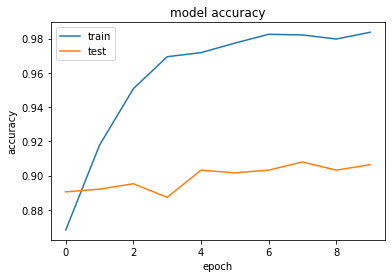

In [28]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
